# Character Encoding 
(컴퓨터에서 쓸 수 있는 bytes 에서 사람이 볼 수 있는 문자로 변환하는 것)

In [1]:
## modules we'll use
import pandas as pd
import numpy as np

# helpful character encoding module
import charset_normalizer

# set seed for reproducibility
np.random.seed(0)

## What are encodings?

encoding 중 character encoding 에 대해서 다루고 있습니다.
<br>
character encoding은 컴퓨터의 binary btye 들을 사람이 볼 수 있게 mapping 시킨 행위입니다.

In [2]:
# start with a string
before = "This is the euro symbol: €"

# check to see what datatype it is
type(before)

str

In [3]:
# encode it to a different encoding, replacing characters that raise errors
after = before.encode("utf-8", errors="replace")

# check the type
type(after)

bytes

In [4]:
# byte 가 되었는데 사람이 볼 수 있게 인코딩이 된것입니다.

In [6]:
after

b'This is the euro symbol: \xe2\x82\xac'

바이트 객체를 보면 앞에 b가 있고 뒤에 텍스트가 있는 것을 볼 수 있습니다. 이는 바이트가 ASCII로 인코딩된 문자인 것처럼 인쇄되기 때문입니다. (ASCII는 영어 이외의 다른 언어를 작성하는 데 실제로 작동하지 않는 오래된 문자 인코딩입니다.) 여기에서 유로 기호가 인쇄될 때 "\xe2\x82\xac"처럼 보이는 mojibake로 대체된 것을 볼 수 있습니다. 마치 ASCII 문자열인 것처럼 말이죠.

In [7]:
print(after.decode("utf-8"))

This is the euro symbol: €


In [8]:
# try to decode our bytes with the ascii encoding
print(after.decode("ascii"))

UnicodeDecodeError: 'ascii' codec can't decode byte 0xe2 in position 25: ordinal not in range(128)

파이썬은 기본적으로 utf-8 로 인코딩이 되기때문에 안되며 애초에 ascii 코드로 만들어진 것을 사용하면 ascii 로 디코딩을 진행할 수 있습니다.

In [9]:
# start with a string
before = "This is the euro symbol: €"

# encode it to a different encoding, replacing characters that raise errors
after = before.encode("ascii", errors = "replace")

# convert it back to utf-8
print(after.decode("ascii"))

# We've lost the original underlying byte string! It's been 
# replaced with the underlying byte string for the unknown character :(

This is the euro symbol: ?


위의 상황은 피해야합니다. text 를 보존하지 못하게 됩니다.

# Reading in files with encoding problem

In [10]:
# try to read in a file not in UTF-8
kickstarter_2016 = pd.read_csv("../input/kickstarter-projects/ks-projects-201612.csv")

FileNotFoundError: [Errno 2] No such file or directory: '../input/kickstarter-projects/ks-projects-201612.csv'

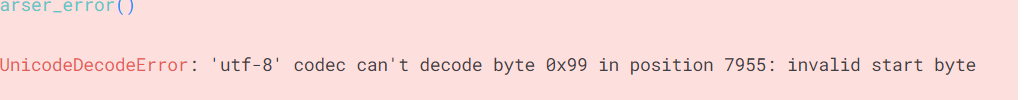

UnicodeDecodeError 라고 명명되어있고 ASCII 코드로 되어있는 파일인데 utf-8 로 디코딩을 진행하고 있어서 오류가 생겼습니다.
<BR>
그러나 사실 이게 무슨 코드로 코딩되어있는지 알 수 없습니다. 그래서 한 가지 방법은 많은 디코딩을 다 일일이 넣어보는 것입니다.
<br>
더 좋은 방법은  the charset_normalizer module 라는 모듈을 사용하면 바로 찾을 수 있습니다.


In [ ]:
# look at the first ten thousand bytes to guess the character encoding
with open("../input/kickstarter-projects/ks-projects-201801.csv", 'rb') as rawdata:
    result = charset_normalizer.detect(rawdata.read(10000))

# check what the character encoding might be
print(result)

결과
<br>
{'encoding': 'utf-8', 'language': 'English', 'confidence': 1.0}

So charset_normalizer is 73% confidence that the right encoding is "Windows-1252". Let's see if that's correct:

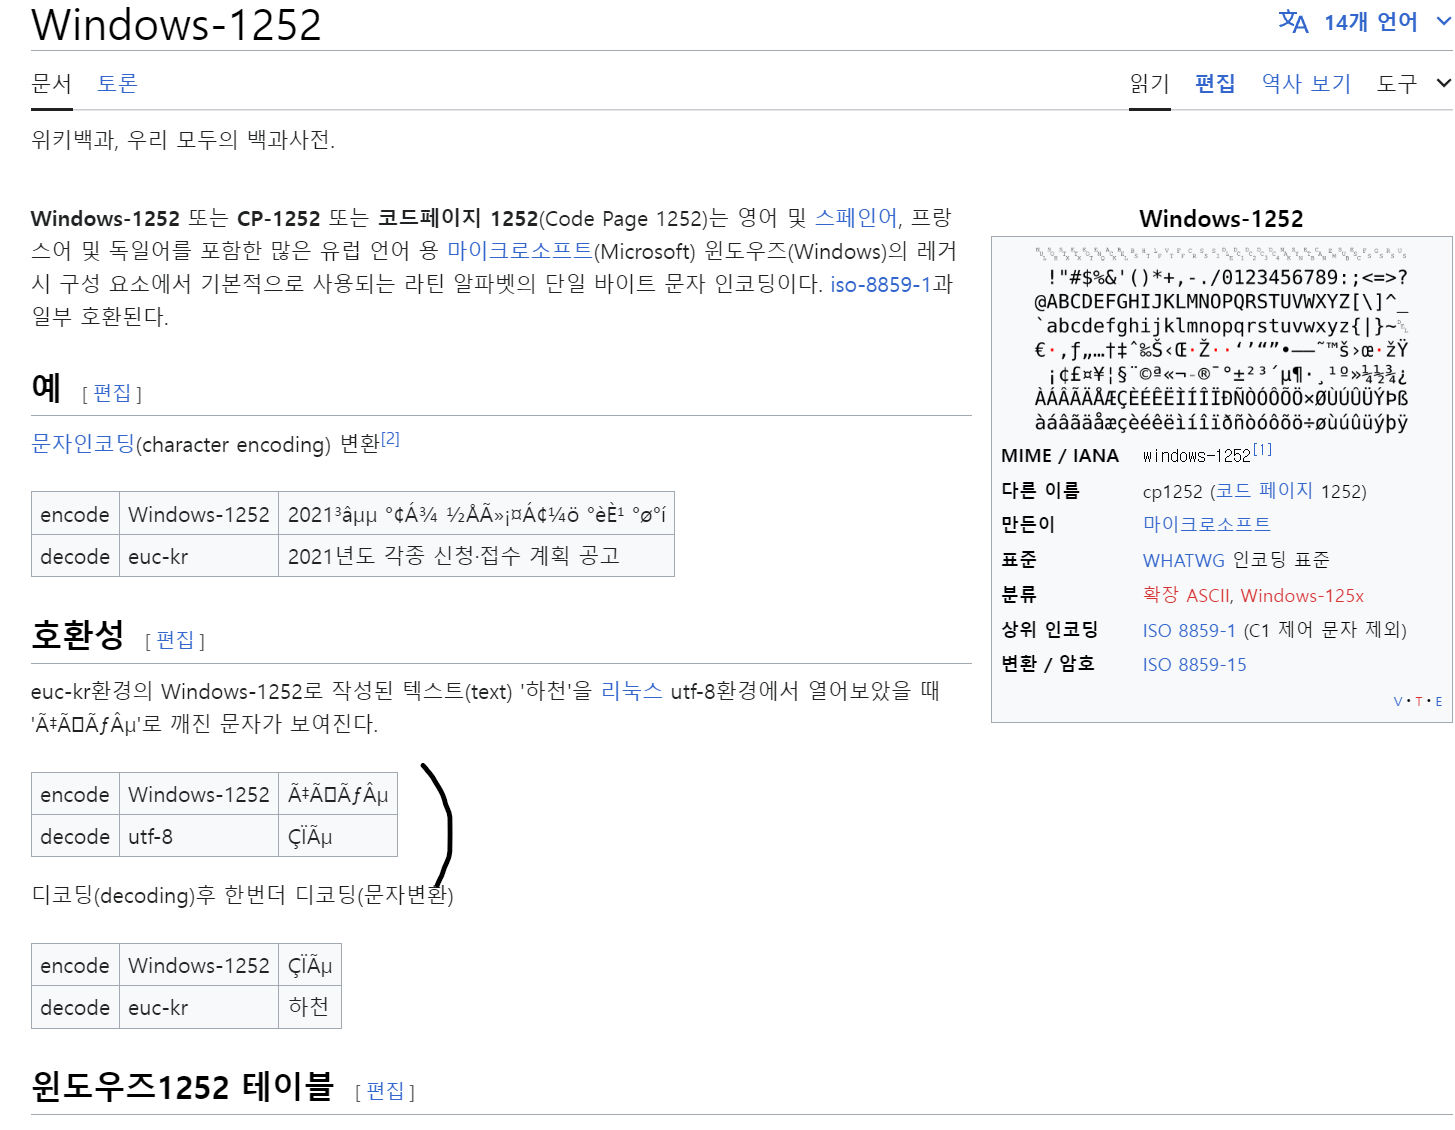

In [ ]:
# read in the file with the encoding detected by charset_normalizer
kickstarter_2016 = pd.read_csv("../input/kickstarter-projects/ks-projects-201612.csv", encoding='Windows-1252')

# look at the first few lines
kickstarter_2016.head()

In [ ]:
# read in the file with the encoding detected by charset_normalizer
kickstarter_2016 = pd.read_csv("../input/kickstarter-projects/ks-projects-201612.csv", encoding='Windows-1252')

# look at the first few lines
kickstarter_2016.head()



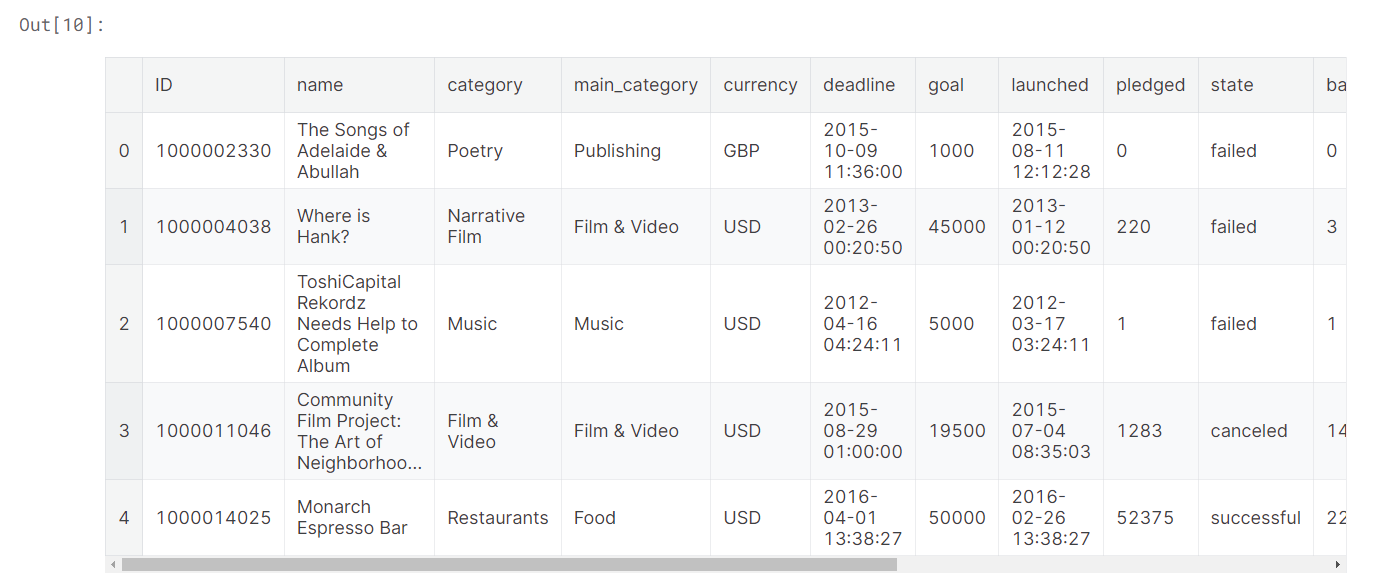

# Saveing UTF-8 ENCODING 

`kickstarter_2016.to_csv("ks-projects-201801-utf8.csv")`